In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

In [3]:
data = pd.read_csv("dataset/datasetAsus.csv")
data.head(5)

,num_processes,imagCollection,max_latency
0,15,94,153.190368
1,17,38,66.354847
2,9,57,40.233471
3,1,13,3.186560
4,9,79,60.714366


In [4]:
data.shape

(1012, 3)

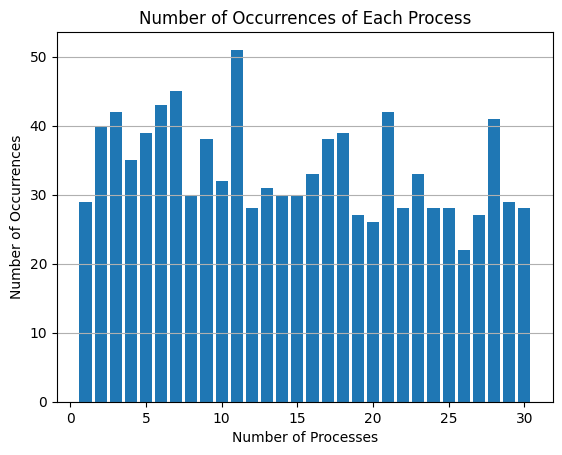

In [5]:
# Number of sample runs on each number of process
process_counts = data['num_processes'].value_counts()

# Plot
plt.bar(process_counts.index, process_counts.values)
plt.xlabel('Number of Processes')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each Process')
plt.grid(axis='y')
plt.show()

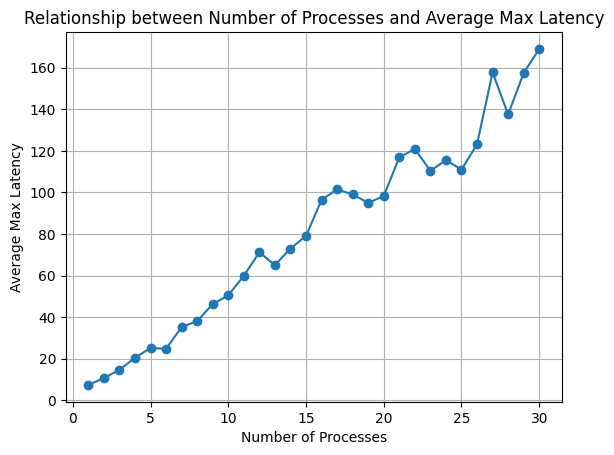

In [6]:
# Relation between number of processes and their average latency
# Group by number of processes and calculate average maximum latency
avg_latency = data.groupby('num_processes')['max_latency'].mean()

# Plot
plt.plot(avg_latency.index, avg_latency.values, marker='o')
plt.xlabel('Number of Processes')
plt.ylabel('Average Max Latency')
plt.title('Relationship between Number of Processes and Average Max Latency')
plt.grid(True)
plt.show()

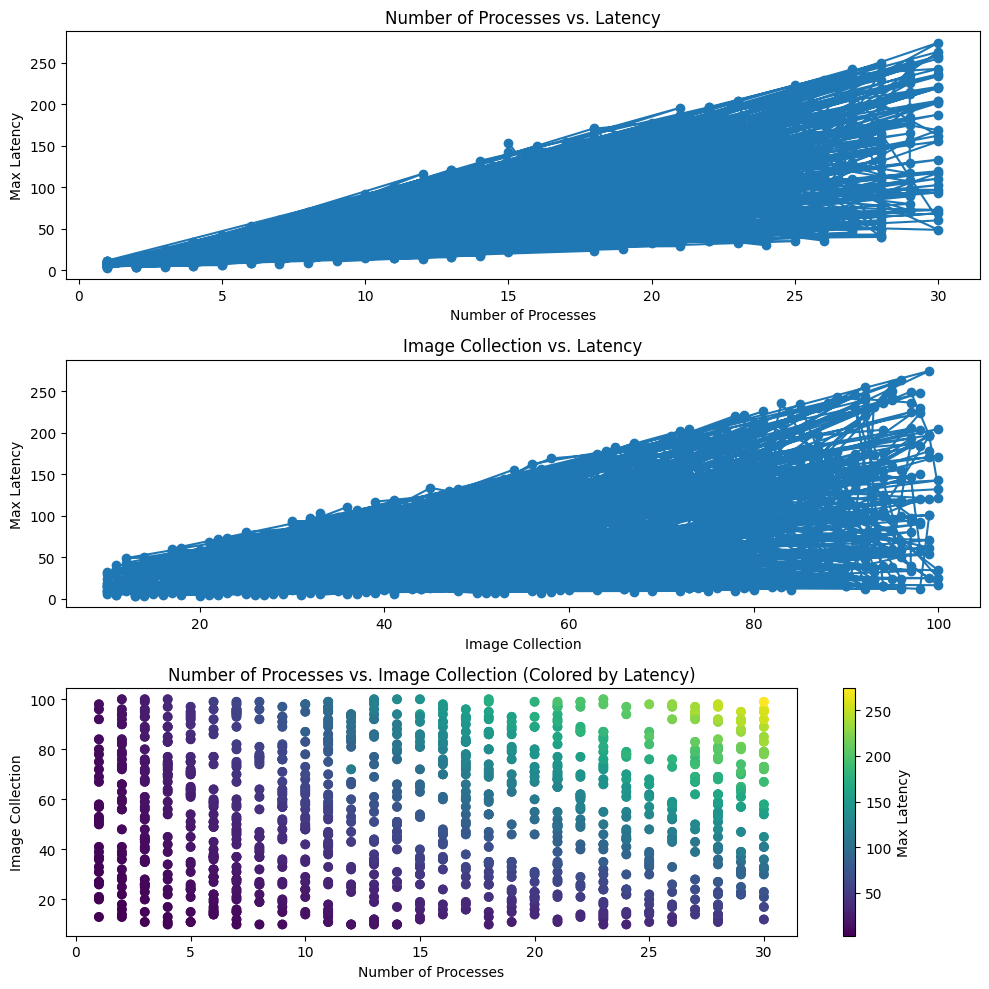

In [10]:
# Extracting columns
num_processes = data['num_processes']
imagCollection = data['imagCollection']
max_latency = data['max_latency']

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Plot for num_processes
ax[0].plot(num_processes, max_latency, marker='o', linestyle='-')
ax[0].set_title('Number of Processes vs. Latency')
ax[0].set_xlabel('Number of Processes')
ax[0].set_ylabel('Max Latency')

# Plot for imagCollection
ax[1].plot(imagCollection, max_latency, marker='o', linestyle='-')
ax[1].set_title('Image Collection vs. Latency')
ax[1].set_xlabel('Image Collection')
ax[1].set_ylabel('Max Latency')

# Plot for both num_processes and imagCollection
ax[2].scatter(num_processes, imagCollection, c=max_latency, cmap='viridis')
ax[2].set_title('Number of Processes vs. Image Collection (Colored by Latency)')
ax[2].set_xlabel('Number of Processes')
ax[2].set_ylabel('Image Collection')
cbar = plt.colorbar(ax[2].scatter(num_processes, imagCollection, c=max_latency, cmap='viridis'))
cbar.set_label('Max Latency')

plt.tight_layout()
plt.show()

150 seconds is my limit

In [11]:
dataCleaned = data[data['max_latency'] <= 150].copy()
dataCleaned.reset_index(drop=True, inplace=True)
print(dataCleaned.head(5))

   num_processes  imagCollection  max_latency
0             17              38    66.354847
1              9              57    40.233471
2              1              13     3.186560
3              9              79    60.714366
4              7              95    54.661912


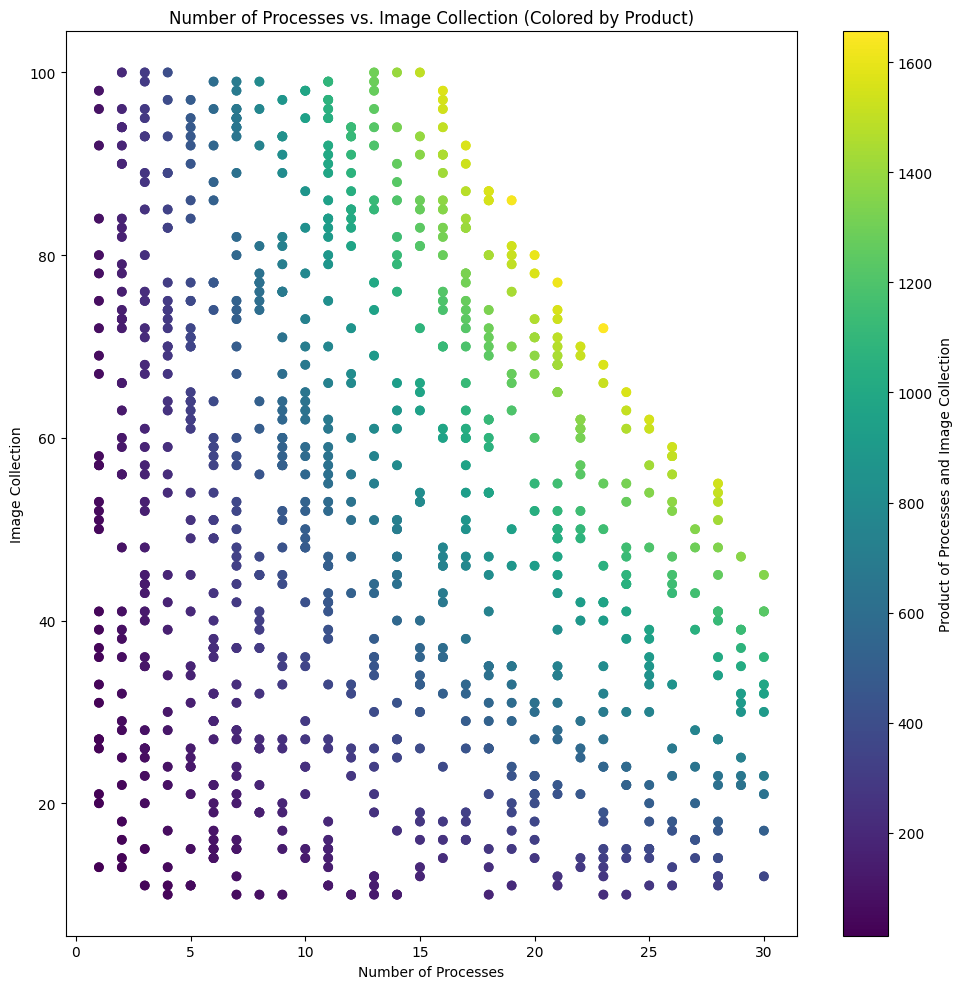

In [23]:
num_processes_cleaned = dataCleaned['num_processes']
imagCollection_cleaned = dataCleaned['imagCollection']
product = num_processes_cleaned * imagCollection_cleaned

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot for both num_processes and imagCollection
ax.scatter(num_processes_cleaned, imagCollection_cleaned, c=product, cmap='viridis')
ax.set_title('Number of Processes vs. Image Collection (Colored by Product)')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Image Collection')
cbar = plt.colorbar(ax.scatter(num_processes_cleaned, imagCollection_cleaned, c=product, cmap='viridis'))
cbar.set_label('Product of Processes and Image Collection')

plt.tight_layout()
plt.show()

In [27]:
# Filtering rows where product is greater than 1500
filtered_data = dataCleaned[dataCleaned['num_processes'] * dataCleaned['imagCollection'] > 1500].copy()
filtered_data['product'] = filtered_data['num_processes'] * filtered_data['imagCollection']

filtered_data = filtered_data.sort_values(by='product')

# Printing the filtered DataFrame
print(filtered_data)

     num_processes  imagCollection  max_latency  product
35              19              79   135.315854     1501
400             16              94   145.078727     1504
774             26              58   146.964695     1508
654             26              58   142.895878     1508
129             28              54   141.406840     1512
626             24              63   144.318863     1512
570             23              66   141.531741     1518
729             22              69   141.868057     1518
698             19              80   139.678085     1520
792             25              61   145.971735     1525
319             17              90   145.561630     1530
800             21              73   143.257413     1533
102             26              59   141.904568     1534
655             16              96   143.795293     1536
245             19              81   139.774054     1539
584             28              55   143.466378     1540
685             22             